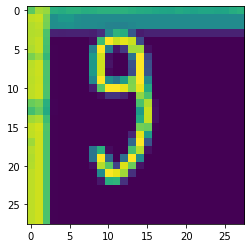

In [10]:
from keras.models import load_model
from tkinter import *
import win32gui
from PIL import ImageGrab, Image,ImageOps
import numpy as np
import tkinter as tk
import cv2
import matplotlib.pyplot as plt


model = load_model('model_mnist.h5')

def predict_digit(img):
    #changing imgage into 28x28 pixel
    img = img.resize((28,28))
    
    #img to grayscale
    img = img.convert('L')
    img = ImageOps.invert(img)
    img = np.array(img)
    # mo = Image.fromarray(img)
    # mo.save('1.jpg')
    plt.imshow(img)
    
    #reshaping according model and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    
    res = model.predict([img])[0]
    
    return np.argmax(res),max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        
        # Elements on canvas and canvas
        self.canvas = tk.Canvas(self, width = 400 , height = 400, bg = 'white', cursor = 'cross')
        self.label = tk.Label(self, text="Waiting..", font=("Helvetica", 40))
        self.classify_btn = tk.Button(self, text = "Recognise", command =self.classify_handwriting) 
        self.clear_btn = tk.Button(self, text = "Clear", command = self.clear_all)
        
        # Grid structure
        self.canvas.grid(row = 0,column = 0, pady= 2, sticky=W)
        self.label.grid(row=0,column=1,padx=2,pady=2)
        self.classify_btn.grid(row = 1,column = 0 , padx = 2,pady = 2)
        self.clear_btn.grid(row = 1, column = 1, pady= 2)
        
        self.canvas.bind("<B1 -Motion>", self.draw_lines)
        
    def clear_all(self):
        self.canvas.delete('all')
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        
#         cv2.imshow(im)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

        
app = App()
mainloop()